In [16]:
import pandas as pd 
import re
import numpy as np

In [7]:
%matplotlib inline

In [117]:
salaries_data = pd.read_csv("data/Salaries.csv")
batting_data = pd.read_csv("data/Batting.csv")
master_data = pd.read_csv("data/Master.csv")
appearances_data = pd.read_csv("data/Appearances.csv")

In [118]:
salaries_data = salaries_data[salaries_data["yearID"] == 2014]
batting_data = batting_data[batting_data["yearID"] == 2014]
appearances_data = appearances_data[appearances_data["yearID"] == 2014]

In [119]:
batting_data = batting_data[batting_data["AB"] > 200]
batting_data["OBP"] = ((batting_data.H + batting_data.BB + batting_data.HBP) / (batting_data.AB + batting_data.BB + batting_2014.HBP + batting_data.SF)).round(3)

In [120]:
batting_data.index = batting_data.pop("playerID")
batting_data = batting_data[["OBP", "AB", "HR", "RBI"]]

In [121]:
salaries_data.index = salaries_data.pop("playerID")
salaries_data = salaries_data[["salary", "lgID", "teamID"]]

In [158]:
main_table = pd.merge(batting_data, salaries_data, left_index = True, right_index = True)
main_table.head()

,OBP,AB,HR,RBI,salary,lgID,teamID
playerID,,,,,,,
abreujo02,0.383,556,36,107,7000000,AL,CHA
ackledu01,0.293,502,14,65,1700000,AL,SEA
adamsma01,0.321,527,15,68,516000,NL,SLN
alonsyo01,0.285,267,7,27,980000,NL,SDN
altuvjo01,0.377,660,7,59,1250000,AL,HOU


In [160]:
master_data = master_data[["nameGiven", "nameLast"]]
main_table = pd.merge(main_table, master_data, left_index = True, right_index = True)
#main_table = main_table[["nameGiven", "nameLast", "OBP", "salary", "HR", "RBI", "AB", "teamID", "lgID"]]

In [183]:
main_table = main_table[["nameGiven", "nameLast", "salary", "OBP", "HR", "RBI", "AB", "teamID", "lgID"]]
#main_table.sort_values(by="salary", ascending=False)

In [230]:
#appearances_data.index = appearances_data.pop("playerID")
appearances_data.head()

,yearID,teamID,lgID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
playerID,,,,,,,,,,,,,,,,,,,,
ahmedni01,2014,ARI,NL,25,18,25,20,0,0,0,2,0,18,0,0,0,0,0,1,4
anderch01,2014,ARI,NL,22,21,21,21,21,0,0,0,0,0,0,0,0,0,0,0,1
arroybr01,2014,ARI,NL,15,14,15,14,14,0,0,0,0,0,0,0,0,0,0,0,1
bolsimi01,2014,ARI,NL,10,9,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0
cahiltr01,2014,ARI,NL,32,17,31,32,32,0,0,0,0,0,0,0,0,0,0,0,0


In [454]:
c_data = appearances_data[["G_c"]]
c_data = c_data[c_data["G_c"] > 50]

first_base_data = appearances_data[["G_1b"]]
first_base_data = first_base_data[first_base_data["G_1b"] > 50]

second_base_data = appearances_data[["G_2b"]]
second_base_data = second_base_data[second_base_data["G_2b"] > 50]

third_base_data = appearances_data[["G_3b"]]
third_base_data = third_base_data[third_base_data["G_3b"] > 50]

ss_data = appearances_data[["G_ss"]]
ss_data = ss_data[ss_data["G_ss"] > 50]

cf_data = appearances_data[["G_cf"]]
cf_data = cf_data[cf_data["G_cf"] > 50]

lf_data = appearances_data[["G_lf"]]
lf_data = lf_data[lf_data["G_lf"] > 50]

rf_data = appearances_data[["G_rf"]]
rf_data = rf_data[rf_data["G_rf"] > 50]

In [455]:
c_data = pd.merge(c_data, main_table, left_index=True, right_index=True)
first_base_data = pd.merge(first_base_data, main_table, left_index=True, right_index=True)
second_base_data = pd.merge(second_base_data, main_table, left_index=True, right_index=True)
third_base_data = pd.merge(third_base_data, main_table, left_index=True, right_index=True)
ss_data = pd.merge(ss_data, main_table, left_index=True, right_index=True)
cf_data = pd.merge(cf_data, main_table, left_index=True, right_index=True)
lf_data = pd.merge(lf_data, main_table, left_index=True, right_index=True)
rf_data = pd.merge(rf_data, main_table, left_index=True, right_index=True)

In [456]:
c_data.insert(3, 'Pos', 'C')
first_base_data.insert(3, 'Pos', '1B')
second_base_data.insert(3, 'Pos', '2B')
third_base_data.insert(3, 'Pos', '3B')
ss_data.insert(3, 'Pos', 'SS')
cf_data.insert(3, 'Pos', 'CF')
lf_data.insert(3, 'Pos', 'LF')
rf_data.insert(3, 'Pos', 'RF')



In [457]:
c_data = c_data.drop('G_c', axis=1)
first_base_data = first_base_data.drop('G_1b', axis=1)
second_base_data = second_base_data.drop('G_2b', axis=1)
third_base_data = third_base_data.drop('G_3b', axis=1)
ss_data = ss_data.drop('G_ss', axis=1)
cf_data = cf_data.drop('G_cf', axis=1)
lf_data = lf_data.drop('G_lf', axis=1)
rf_data = rf_data.drop('G_rf', axis=1)

In [458]:
eligible_players_data = pd.concat([c_data, first_base_data, second_base_data, third_base_data, ss_data, cf_data, lf_data, rf_data])

In [590]:
#eligible_players_data.insert(3, "Value", ((eligible_players_data.OBP / eligible_players_data.salary) * 100000000).round(2))
#value_ranking = eligible_players_data.sort_values(by="Value", ascending=False)


In [496]:
#list of player positions, ranked by value

value_ranking_c = value_ranking[value_ranking["Pos"] == "C"]
value_ranking_1st_base = value_ranking[value_ranking["Pos"] == "1B"]
value_ranking_2nd_base = value_ranking[value_ranking["Pos"] == "2B"]
value_ranking_3rd_base = value_ranking[value_ranking["Pos"] == "3B"]
value_ranking_ss = value_ranking[value_ranking["Pos"] == "SS"]
value_ranking_cf = value_ranking[value_ranking["Pos"] == "CF"]
value_ranking_rf = value_ranking[value_ranking["Pos"] == "RF"]
value_ranking_lf = value_ranking[value_ranking["Pos"] == "LF"]

In [495]:
#way to indentify multi-position players
#eligible_players_data.groupby(level=0).filter(lambda x: len(x) > 1).sort_values(by="nameGiven")

In [516]:
value_ranking_c.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
norride01,Derek Russell,Norris,C,71.49,505000,0.361,10,55,385,OAK,AL
mesorde01,Devin Douglas,Mesoraco,C,68.38,525000,0.359,25,80,384,CIN,NL
riverre01,Rene,Rivera,C,62.99,506400,0.319,11,44,294,SDN,NL
gattiev01,James Evan,Gattis,C,60.93,520250,0.317,22,52,369,ATL,NL
rosarwi01,Wilin Arismendy,Rosario,C,60.76,502000,0.305,13,54,382,COL,NL
darnatr01,Travis E.,d'Arnaud,C,60.21,501560,0.302,13,41,385,NYM,NL
chiriro01,Robinson David,Chirinos,C,57.74,502232,0.290,13,40,306,TEX,AL
gomesya01,Yan,Gomes,C,56.91,550000,0.313,21,74,485,CLE,AL
congeha01,Hyun Choi,Conger,C,56.62,517500,0.293,4,25,231,LAA,AL


Catcher - Devin Mesoraco

Devin Mesoraco is the clear choice for catcher, with a high .359 OBP while getting paid at a ridiculously low rookie scale contract of $$525,000. Better yet, he hit for power with 25 homers and 85 RBIs. He just beats out Derek Norris due to his power. If I had an unlimited budget, I'd sign Russell Martin, the only catcher with an OBP above .400, but he was paid $8.5 million for his efforts.

In [515]:
value_ranking_1st_base.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
adamsma01,Matthew James,Adams,1B,62.21,516000,0.321,15,68,527,SLN,NL
pearcst01,Steven Wayne,Pearce,1B,53.29,700000,0.373,21,49,338,BAL,AL
goldspa01,Paul Edward,Goldschmidt,1B,36.00,1100000,0.396,19,69,406,ARI,NL
loneyja01,James Anthony,Loney,1B,33.60,1000000,0.336,9,69,600,TBA,AL
penabr01,Brayan Eduardo,Pena,1B,33.26,875000,0.291,5,26,348,CIN,NL
rizzoan01,Anthony Vincent,Rizzo,1B,30.88,1250000,0.386,32,78,524,CHN,NL
alonsyo01,Yonder,Alonso,1B,29.08,980000,0.285,7,27,267,SDN,NL
overbly01,Lyle Stefan,Overbay,1B,21.87,1500000,0.328,4,35,258,MIL,NL
dudalu01,Lucas Christopher,Duda,1B,21.31,1637500,0.349,30,92,514,NYM,NL


1st Base - Anthony Rizzo

1st base is a crucial offensive position, but luckily there are a number of great bargain players to choose from. I'm choosing Anthony Rizzo, who batted for a ridiculous .386 OBP with 32 home runs and 86 RBIs for a salary of just over $1M. Paul Goldschmitt comes in at a close second with a slightly higher OBP and very slightly lower salary, but about half as many home runs. 

In [550]:
print(value_ranking_2nd_base.sort_values("OBP", ascending=False).head(10))
value_ranking_2nd_base.head(10)

                 nameGiven  nameLast Pos  Value    salary    OBP  HR  RBI  \
playerID                                                                    
canoro01     Robinson Jose      Cano  2B   1.59  24000000  0.382  14   82   
altuvjo01      Jose Carlos    Altuve  2B  30.16   1250000  0.377   7   59   
weeksri01   Rickie Darnell     Weeks  2B   3.25  11000000  0.357   8   29   
zobribe01  Benjamin Thomas   Zobrist  2B   5.06   7000000  0.354  10   52   
kendrho01    Howard Joseph  Kendrick  2B   3.71   9350000  0.347   7   75   
doziebr01      James Brian    Dozier  2B  63.89    540000  0.345  23   71   
walkene01      Neil Martin    Walker  2B   5.95   5750000  0.342  23   76   
utleych01    Chase Cameron     Utley  2B   2.26  15000000  0.339  11   78   
pedrodu01      Dustin Luis   Pedroia  2B   2.70  12500000  0.337   7   53   
murphda08    Daniel Thomas    Murphy  2B   5.82   5700000  0.332   9   57   

            AB teamID lgID  
playerID                    
canoro01   595   

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
doziebr01,James Brian,Dozier,2B,63.89,540000,0.345,23,71,598,MIN,AL
gennesc01,Ryan Joseph,Gennett,2B,63.49,504000,0.320,9,54,440,MIL,NL
gordode01,Devaris,Gordon,2B,63.30,515000,0.326,2,34,609,LAN,NL
lemahdj01,David John,LeMahieu,2B,62.87,501000,0.315,5,42,494,COL,NL
solando01,Donovan,Solano,2B,58.65,511500,0.300,3,28,310,MIA,NL
sogarer01,Eric Sidney,Sogard,2B,58.43,510000,0.298,1,22,291,OAK,AL
wongko01,Kolten Kaha,Wong,2B,58.40,500000,0.292,12,42,402,SLN,NL
forsylo01,John Logan,Forsythe,2B,56.31,509700,0.287,6,26,301,TBA,AL
gyorkje01,Jedd Lindon,Gyorko,2B,54.81,510900,0.280,10,51,400,SDN,NL


Second Base - James Dozier

It's clear that second base is a much weaker offensive position than 1st base. Robinson Kano is the standout in terms of OBP, but he's getting paid $$24M and isthus out of our price range. We're going with James Dozier, who's an incredible value at $540,000 with the 6th ranked OBP at .354 and power to match with 23 hrs. and 71 RBIs.

In [553]:
value_ranking_3rd_base.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
donaljo02,Joshua Adam,Donaldson,3B,68.40,500000,0.342,29,98,608,OAK,AL
harrijo05,Joshua Isaiah,Harrison,3B,67.64,513000,0.347,13,52,520,PIT,NL
chiselo01,Lonnie David,Chisenhall,3B,67.15,510800,0.343,13,59,478,CLE,AL
gillaco01,Conor Michael,Gillaspie,3B,65.62,512000,0.336,7,57,464,CHA,AL
arenano01,Nolan James,Arenado,3B,65.60,500000,0.328,18,61,432,COL,NL
machama01,Manuel Arturo,Machado,3B,62.43,519000,0.324,12,32,327,BAL,AL
seageky01,Kyle Duerr,Seager,3B,61.84,540100,0.334,25,96,590,SEA,AL
ascheco01,Cody James,Asche,3B,61.80,500000,0.309,10,46,397,PHI,NL
casteni01,Nicholas A.,Castellanos,3B,61.20,500000,0.306,11,66,533,DET,AL


3B - Justin Turner

Justin Turner is an amazing steal here with a .404 OBP and a salary of $1M. He beats out Joshua Donaldson, who had an OBP of .342 and a salary of $500,000. 

In [530]:
value_ranking_ss.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
gonzama01,Marwin Javier,Gonzalez,SS,64.82,504500,0.327,6,23,285,HOU,AL
rutlejo01,Joshua Alan,Rutledge,SS,64.47,501000,0.323,4,33,309,COL,NL
escobed01,Eduardo Jose,Escobar,SS,62.07,507500,0.315,6,37,433,MIN,AL
owingch01,Christopher Scott,Owings,SS,60.00,500000,0.300,6,26,310,ARI,NL
mercejo03,Jordy Joe,Mercer,SS,59.17,515500,0.305,12,55,506,PIT,NL
crawfbr01,Brandon Michael,Crawford,SS,57.86,560000,0.324,10,69,491,SFG,NL
bogaexa01,Xander Jan,Bogaerts,SS,57.45,517000,0.297,12,46,538,BOS,AL
gregodi01,Mariekson Julius,Gregorius,SS,57.26,506500,0.290,6,27,270,ARI,NL
millebr02,Bradley Austin,Miller,SS,56.46,510100,0.288,10,36,367,SEA,AL


SS - Marwin Gonzalez

With a weak offesnive position like SS, the best we could do was Marwin Gonzalez, who batted for .327 OBP on a $500,000 salary.

In [556]:
value_ranking_cf.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
eatonad02,Adam Cory,Eaton,CF,70.84,511000,0.362,1,35,486,CHA,AL
polloaj01,Allen Lorenz,Pollock,CF,69.63,507000,0.353,7,24,265,ARI,NL
blackch02,Charles Cobb,Blackmon,CF,66.87,501000,0.335,19,72,593,COL,NL
lagarju01,Juan Osvaldo,Lagares,CF,63.36,506636,0.321,4,47,416,NYM,NL
ozunama01,Marcell,Ozuna,CF,62.77,505000,0.317,23,85,565,MIA,NL
cainlo01,Lorenzo Lamar,Cain,CF,62.09,546000,0.339,5,53,471,KCA,AL
jennide01,Desmond Delane,Jennings,CF,61.70,517000,0.319,10,36,479,TBA,AL
dysonja01,Jarrod Martel,Dyson,CF,61.13,530000,0.324,1,24,260,KCA,AL
hamilbi02,Billy R.,Hamilton,CF,58.40,500000,0.292,6,48,563,CIN,NL


In [559]:
value_ranking_rf.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
blackch02,Charles Cobb,Blackmon,RF,66.87,501000,0.335,19,72,593,COL,NL
calhoko01,Kole Alan,Calhoun,RF,64.23,506000,0.325,17,58,493,LAA,AL
navada01,Daniel James,Nava,RF,62.17,556500,0.346,4,37,363,BOS,AL
cainlo01,Lorenzo Lamar,Cain,RF,62.09,546000,0.339,5,53,471,KCA,AL
arciaos01,Oswaldo Celestino,Arcia,RF,58.54,512500,0.300,20,57,372,MIN,AL
barnebr02,Brandon Michael,Barnes,RF,58.48,501000,0.293,8,27,292,COL,NL
myerswi01,William Bradford,Myers,RF,58.31,504200,0.294,6,35,325,TBA,AL
snidetr01,Travis James,Snider,RF,28.17,1200000,0.338,13,38,322,PIT,NL
aokino01,Norichika,Aoki,RF,17.90,1950000,0.349,1,43,491,KCA,AL


RF - Yaisel Puig
There weren't too many great bargains at RF, so I've decided to "splurge" at the position and choose one of the bright young starts in the game, Yaisel Puig, for $$3.7M. His OBP of .382 was too high to pass up and really rounds out the lineup well. 

In [538]:
value_ranking_lf.head(10)

,nameGiven,nameLast,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
playerID,,,,,,,,,,,
dickeco01,McKenzie Corey,Dickerson,LF,72.80,500000,0.364,24,76,436,COL,NL
yelicch01,Christian Stephen,Yelich,LF,71.68,505000,0.362,9,54,582,MIA,NL
martest01,Starling Javier,Marte,LF,71.20,500000,0.356,13,56,495,PIT,NL
grossro01,Robert Edward,Grossman,LF,66.80,504500,0.337,6,37,360,HOU,AL
guyerbr01,Brandon Eric,Guyer,LF,66.64,501200,0.334,3,26,259,TBA,AL
daviskh01,Khristopher Adrian,Davis,LF,59.44,503000,0.299,22,69,501,MIL,NL
browndo01,Domonic Larun,Brown,LF,51.82,550000,0.285,10,63,473,PHI,NL
lakeju01,Junior Osvaldo,Lake,LF,48.96,502500,0.246,9,25,308,CHN,NL
brantmi02,Michael Charles,Brantley,LF,25.67,1500000,0.385,20,97,611,CLE,AL


LF - McKenzie Dickerson

A no-brainer here, as McKenzie Dickerson batted for a very respectable .364 OBP at a salary of $500,000.

In [566]:
LF = value_ranking_lf[0:1]
C = value_ranking_c[1:2]
FirB = value_ranking_1st_base[5:6]
SecB = value_ranking_2nd_base[0:1]
ThirdB = value_ranking_3rd_base[15:16]
SS = value_ranking_ss[0:1]
CF = value_ranking_cf[10:11]
RF = value_ranking_rf[13:14]
LF = value_ranking_lf[0:1]

In [648]:
roster = pd.concat([C, FirB, SecB, ThirdB, SS, CF, RF, LF])

In [649]:
roster.index = roster.pop("nameLast")

In [650]:
c_mean_OBP = value_ranking_c["OBP"].mean().round(3)
c_mean_salary = value_ranking_c["salary"].mean().round()

first_base_mean_OBP = value_ranking_1st_base["OBP"].mean().round(3)
first_base_mean_salary = value_ranking_1st_base["salary"].mean().round()

second_base_mean_OBP = value_ranking_2nd_base["OBP"].mean().round(3)
second_base_mean_salary = value_ranking_2nd_base["salary"].mean().round()

third_base_mean_OBP = value_ranking_3rd_base["OBP"].mean().round(3)
third_base_mean_salary = value_ranking_3rd_base["salary"].mean().round()

ss_mean_OBP = value_ranking_ss["OBP"].mean().round(3)
ss_mean_salary = value_ranking_ss["salary"].mean().round()

cf_mean_OBP = value_ranking_cf["OBP"].mean().round(3)
cf_mean_salary = value_ranking_cf["salary"].mean().round()

lf_mean_OBP = value_ranking_lf["OBP"].mean().round(3)
lf_mean_salary = value_ranking_lf["salary"].mean().round()

rf_mean_OBP = value_ranking_rf["OBP"].mean().round(3)
rf_mean_salary = value_ranking_rf["salary"].mean().round()

overall_mean_OBP = eligible_players_data["OBP"].mean().round(3)
overall_mean_salary = eligible_players_data["salary"].mean().round()

roster_mean_OBP = roster["OBP"].mean().round(3)
roster_mean_salary = roster["salary"].mean().round()

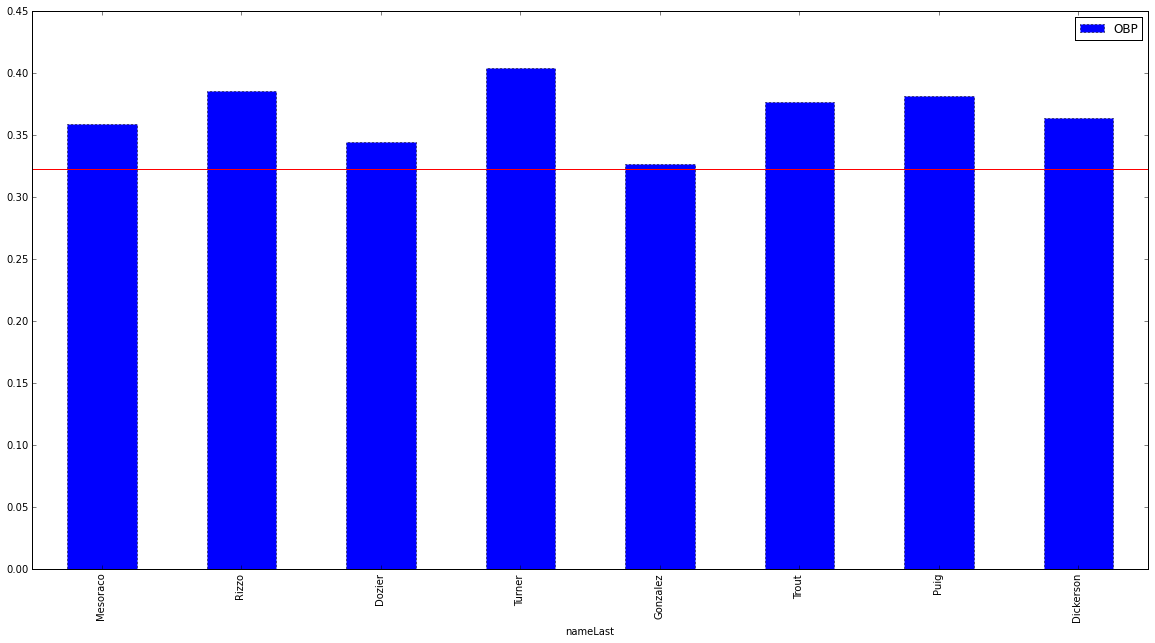

In [651]:
graph = roster[["OBP"]].plot(kind='bar', figsize=(20, 10), linestyle="dotted")
graph.hlines(overall_mean_OBP, -1, 9, color="red")

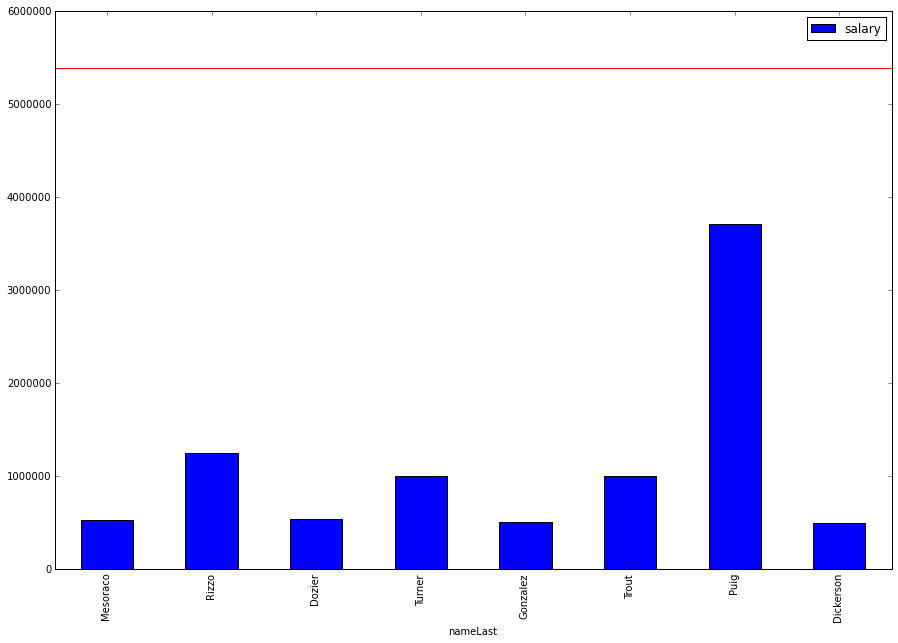

In [652]:
graph1 = roster[["salary"]].plot(kind='bar', figsize=(15, 10))
graph1.hlines(overall_mean_salary, -1, 9, color="red")

In [653]:
help(graph.hlines)

Help on method hlines in module matplotlib.axes._axes:

hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot horizontal lines at each `y` from `xmin` to `xmax`.
    
    Parameters
    ----------
    y : scalar or sequence of scalar
        y-indexes where to plot the lines.
    
    xmin, xmax : scalar or 1D array_like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have same length.
    
    colors : array_like of colors, optional, default: 'k'
    
    linestyles : ['solid' | 'dashed' | 'dashdot' | 'dotted'], optional
    
    label : string, optional, default: ''
    
    Returns
    -------
    lines : `~matplotlib.collections.LineCollection`
    
    Other parameters
    ----------------
    kwargs :  `~matplotlib.collections.LineCollection` properties.
    
    See also
    --------
    vlines : vertical lines
    
    Examples
    --------
  

In [654]:
roster

,nameGiven,Pos,Value,salary,OBP,HR,RBI,AB,teamID,lgID
nameLast,,,,,,,,,,
Mesoraco,Devin Douglas,C,68.38,525000,0.359,25,80,384,CIN,NL
Rizzo,Anthony Vincent,1B,30.88,1250000,0.386,32,78,524,CHN,NL
Dozier,James Brian,2B,63.89,540000,0.345,23,71,598,MIN,AL
Turner,Justin Matthew,3B,40.40,1000000,0.404,7,43,288,LAN,NL
Gonzalez,Marwin Javier,SS,64.82,504500,0.327,6,23,285,HOU,AL
Trout,Michael Nelson,CF,37.70,1000000,0.377,36,111,602,LAA,AL
Puig,Yasiel,RF,10.29,3714000,0.382,16,69,558,LAN,NL
Dickerson,McKenzie Corey,LF,72.80,500000,0.364,24,76,436,COL,NL
